In [2]:
import numpy as np
import pandas as pd

import statsmodels.formula.api as sfa
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
import scipy.stats as stats

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

C:\Users\Gaurav Siwal\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Data Description

In [3]:
# Lets read the dataset

data = pd.read_csv('Medicalpremium.csv')

In [4]:
# A breif description about data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


### Bivariate Analysis

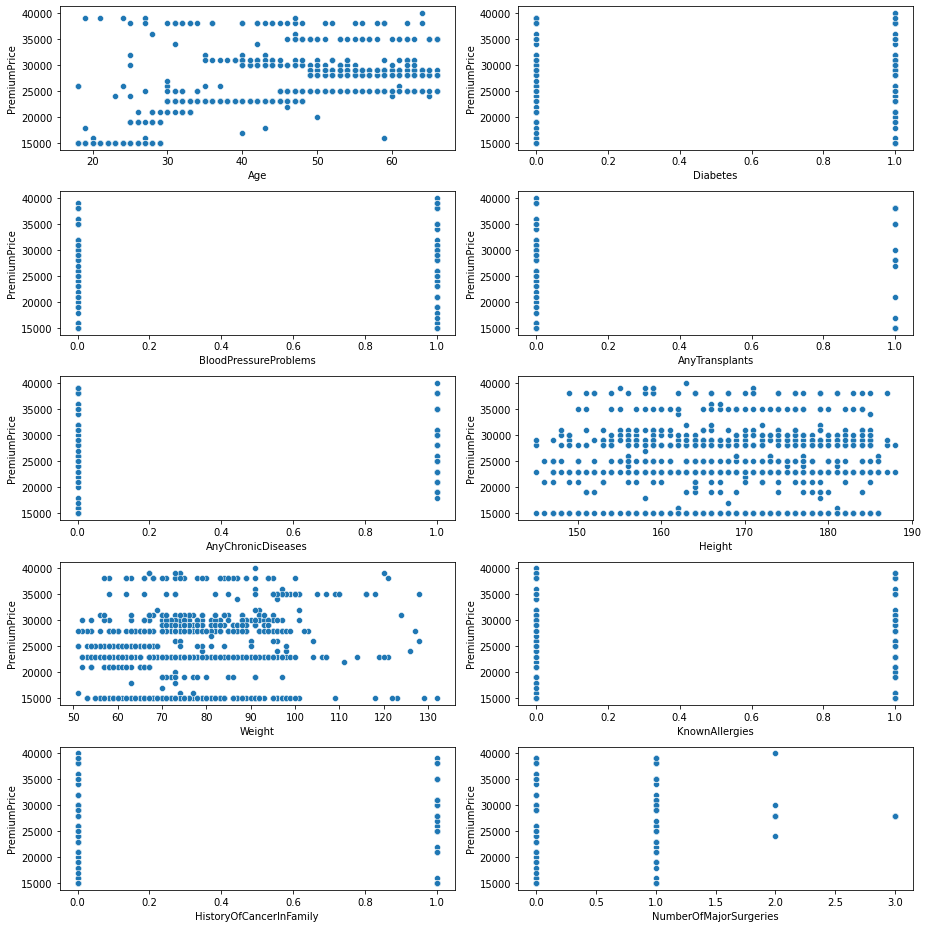

In [6]:
t = 1
plt.figure(figsize=(13,13))
for i in data.columns:
    if i!='PremiumPrice':
        plt.subplot(5,2,t)
        sns.scatterplot(x=data[i],y=data['PremiumPrice'])
        t+=1
plt.tight_layout()
plt.show()

<Axes: >

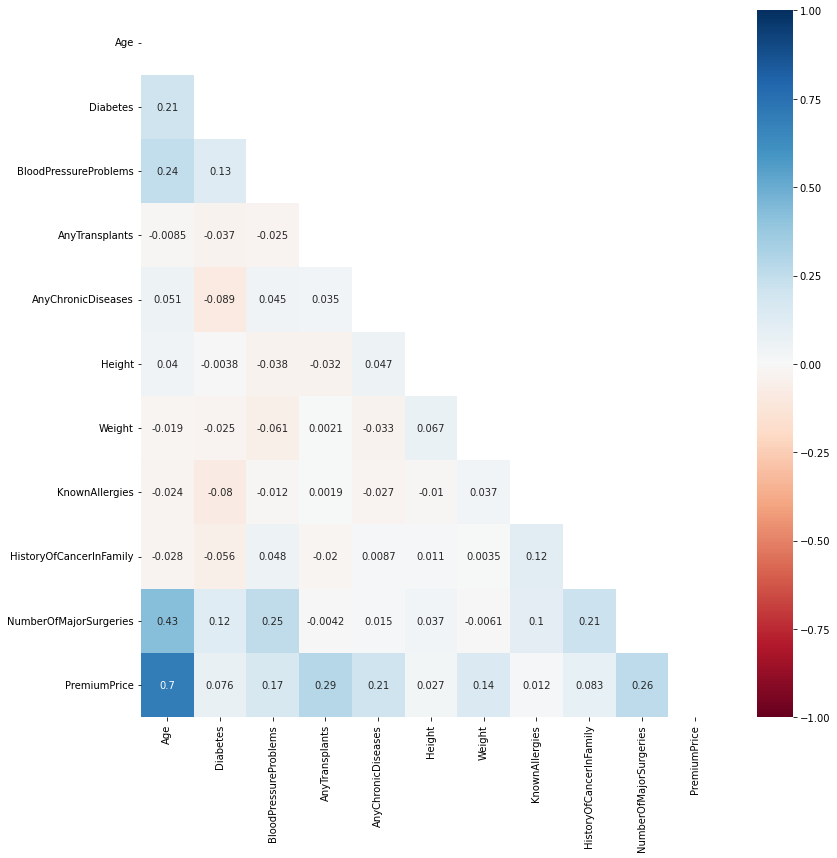

In [7]:
plt.figure(figsize=(13,13))
sns.heatmap(data.corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True,mask=np.triu(data.corr()))

## Removing defects from dataset

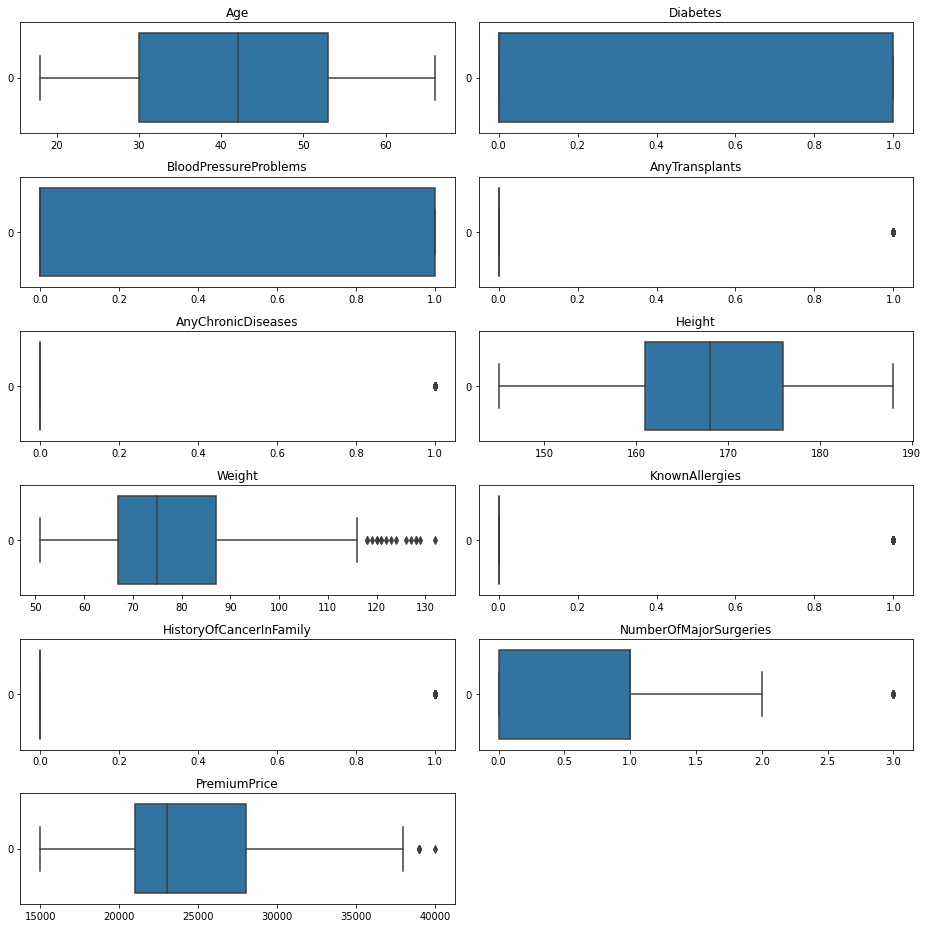

In [8]:
# Outliers
t = 1
plt.figure(figsize=(13,13))
for i in data.columns:
    plt.subplot(6,2,t)
    plt.title(i)
    sns.boxplot(data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

### Building a base mode

In [83]:
x = data.drop(columns=['PremiumPrice'])
y = data['PremiumPrice']
x_c = sma.add_constant(x)

model1 = sma.OLS(y,x_c).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PremiumPrice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     175.5
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          3.92e-210
Time:                        22:49:16   Log-Likelihood:                -9508.6
No. Observations:                 986   AIC:                         1.904e+04
Df Residuals:                     975   BIC:                         1.909e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5480.6098   2095.294      2.616      0.009    1368.804    9592.416
Age                       329.3671      9.839     33.474      0.000     310.058     348.676
Diabetes                 -429.1198    251.419     -1.707      0.088    -922.505      64.266
BloodPressureProblems     180.5036    252.421      0.715      0.475    -314.847     675.854
AnyTransplants           7894.2013    521.963     15.124      0.000    6869.902    8918.501
AnyChronicDiseases       2654.8864    313.990      8.455      0.000    2038.713    3271.060
Height                     -5.8219     11.919     -0.488      0.625     -29.212      17.569
Weight                     69.6753      8.428      8.267      0.000      53.137      86.214
KnownAllergies            300.8824    295.796      1.017      0.309    -279.587     881.352
HistoryOfCancerInFamily  2311.8294    385.373      5.999      0.000    1555.572    3068.086
NumberOfMajorSurgeries   -654.1862    186.103     -3.515      0.000   -1019.395    -288.977
==============================================================================
Omnibus:                      238.003   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1342.106
Skew:                           0.981   Prob(JB):                    3.68e-292
Kurtosis:                       8.368   Cond. No.                     3.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# Check VIF for multicollienariry


vif_list = []

for i in range(x.shape[1]):
    vif_list.append(variance_inflation_factor(x.values,i))

pd.DataFrame({'Feature Names':x.columns,'VIF':vif_list}).\
sort_values(by='VIF',ascending=False)

,Feature Names,VIF
5,Height,37.883544
6,Weight,28.556201
0,Age,12.914143
9,NumberOfMajorSurgeries,2.427825
2,BloodPressureProblems,2.076313
1,Diabetes,1.856513
7,KnownAllergies,1.314811
4,AnyChronicDiseases,1.245678
8,HistoryOfCancerInFamily,1.222508
3,AnyTransplants,1.061514


In [9]:
# In order deal with multicollinearty we need to remove age,weight and height
# Lets check the model without "Age"

# We can see a significant drop in R2

sma.OLS(y,x_c.drop(columns=['Age'])).fit().rsquared

0.23253257382337522

In [10]:
# Lets check the model without "Height"

# We can see almost no drop in R2

sma.OLS(y,x_c.drop(columns=['Height'])).fit().rsquared

0.6428246828906854

In [11]:
# Lets check the model without "Weight"

# We can see a little drop in R2

sma.OLS(y,x_c.drop(columns=['Weight'])).fit().rsquared

0.6178790404866947

In [12]:
# Lets drop height and chek the VIF again

x.drop(columns=['Height'],inplace=True)

vif_list = []

for i in range(x.shape[1]):
    vif_list.append(variance_inflation_factor(x.values,i))

pd.DataFrame({'Feature Names':x.columns,'VIF':vif_list}).\
sort_values(by='VIF',ascending=False)

,Feature Names,VIF
0,Age,10.632014
5,Weight,8.248741
8,NumberOfMajorSurgeries,2.406929
2,BloodPressureProblems,2.067879
1,Diabetes,1.849300
6,KnownAllergies,1.309743
4,AnyChronicDiseases,1.235179
7,HistoryOfCancerInFamily,1.214707
3,AnyTransplants,1.060695


In [13]:
# So still we have multicollinearity in Age and Weight
# Lets drop them one by one and sees How it affects the model

# Its a significant drop in R2

x_c = sma.add_constant(x)

sma.OLS(y,x_c.drop(columns=['Age'])).fit().rsquared

0.23239683954055979

In [14]:
# Lets check the model without "Weight"

# We can see a little drop in R2

sma.OLS(y,x_c.drop(columns=['Weight'])).fit().rsquared

0.617877553695564

In [15]:
# Lets drop 'Weight' and check the VIF Again

x.drop(columns=['Weight'],inplace=True)

vif_list = []

for i in range(x.shape[1]):
    vif_list.append(variance_inflation_factor(x.values,i))

pd.DataFrame({'Feature Names':x.columns,'VIF':vif_list}).\
sort_values(by='VIF',ascending=False)

,Feature Names,VIF
0,Age,4.033684
7,NumberOfMajorSurgeries,2.337905
2,BloodPressureProblems,2.064790
1,Diabetes,1.837525
5,KnownAllergies,1.265770
4,AnyChronicDiseases,1.229153
6,HistoryOfCancerInFamily,1.192143
3,AnyTransplants,1.055021


In [16]:
# These columns looks just fine, with no multicollinearity

In [17]:
x_c = sma.add_constant(x)

model2 = sma.OLS(y,x_c).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PremiumPrice   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     197.5
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          3.75e-198
Time:                        22:16:07   Log-Likelihood:                -9542.0
No. Observations:                 986   AIC:                         1.910e+04
Df Residuals:                     977   BIC:                         1.915e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    9932.7064    413.694     24.010      0.000    9120.876    1.07e+04
Age                       329.0877     10.163     32.382      0.000     309.145     349.031
Diabetes                 -464.3084    259.775     -1.787      0.074    -974.090      45.473
BloodPressureProblems      70.7189    260.086      0.272      0.786    -439.672     581.110
AnyTransplants           7907.5528    539.075     14.669      0.000    6849.674    8965.432
AnyChronicDiseases       2566.4592    323.917      7.923      0.000    1930.806    3202.113
KnownAllergies            384.0890    305.470      1.257      0.209    -215.363     983.541
HistoryOfCancerInFamily  2310.1470    398.236      5.801      0.000    1528.650    3091.644
NumberOfMajorSurgeries   -645.6286    192.224     -3.359      0.001   -1022.849    -268.409
==============================================================================
Omnibus:                      237.890   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1123.758
Skew:                           1.036   Prob(JB):                    9.53e-245
Kurtosis:                       7.802   Cond. No.                         194.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Check for th other Assumptions
# Linerity
# Normality
# Homoscedasticty
# Autocorrelation

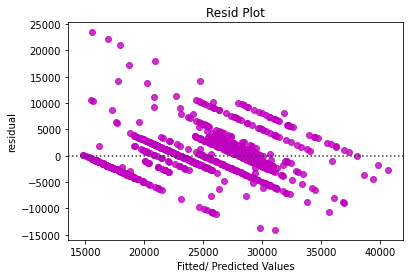

In [19]:
# Assumption of Linearity & Homoskedasticity
sns.residplot(x=model2.fittedvalues,y=model2.resid,color='m')
plt.xlabel('Fitted/ Predicted Values')
plt.ylabel('residual')
plt.title('Resid Plot')
plt.show()

In [20]:
# Rainbow test for linearity

# Ho: Varaibles are linear
# Ha: Variables are not linear
p_val = linear_rainbow(model2)[1]

if p_val <0.05:
    print('Reject Ho:')
else:
    print('Fail to reject Ho:')

Reject Ho:


In [21]:
# Breusch pagan test

# Ho: The variance is same: Homoskedastic
# Ha: The variance is not same: Heteresckedastic

p_value = sma.stats.diagnostic.het_breuschpagan(resid=model2.resid,exog_het=model2.model.exog)[1]
print(p_value)
if p_value> 0.05:
    print('Fail to reject Ho:')
else:
    print('reject Ho:')

6.557300412303008e-14
reject Ho:


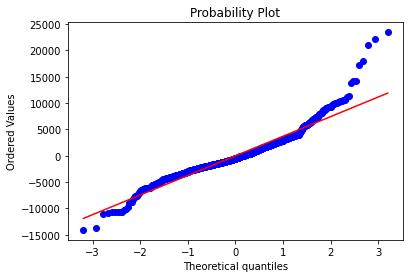

In [22]:
# Normality

stats.probplot(model2.resid,plot=plt)
plt.show()

In [23]:
# Shapiro Wilk test (N < 5000)

# Ho: The data is normal
# ha: The data is not normal

p_val = stats.shapiro(model2.resid)[1]
print(p_val)
if p_val> 0.05:
    print('Fail to reject Ho:')
else:
    print('reject Ho:')

2.9753850211729712e-21
reject Ho:


## Model Validation

In [24]:
# Lets do a train test split to validate the model

In [25]:
def validation(test,pred):
    print('R2:',r2_score(test,pred))
    print('MSE:',mean_squared_error(test,pred))
    print('RMSE:',np.sqrt(mean_squared_error(test,pred)))
    print('MAE:',mean_absolute_error(test,pred))
    print('MAPE:',mean_absolute_percentage_error(test,pred))

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=2)

In [27]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(739, 8) (739,) (247, 8) (247,)


In [28]:
x_train_c = sma.add_constant(x_train)
x_test_c = sma.add_constant(x_test)

In [29]:
model2 = sma.OLS(y_train,x_train_c).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PremiumPrice   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     146.3
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          4.33e-146
Time:                        22:16:07   Log-Likelihood:                -7155.2
No. Observations:                 739   AIC:                         1.433e+04
Df Residuals:                     730   BIC:                         1.437e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    9857.5677    479.350     20.564      0.000    8916.499    1.08e+04
Age                       330.0951     11.847     27.863      0.000     306.837     353.353
Diabetes                 -405.5956    303.059     -1.338      0.181   -1000.566     189.375
BloodPressureProblems     152.3235    301.870      0.505      0.614    -440.312     744.960
AnyTransplants           7541.9380    628.764     11.995      0.000    6307.536    8776.340
AnyChronicDiseases       2490.8884    371.056      6.713      0.000    1762.423    3219.354
KnownAllergies            430.2042    363.145      1.185      0.237    -282.729    1143.137
HistoryOfCancerInFamily  2779.3365    472.858      5.878      0.000    1851.013    3707.660
NumberOfMajorSurgeries   -738.8008    226.689     -3.259      0.001   -1183.842    -293.760
==============================================================================
Omnibus:                      171.220   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              731.716
Skew:                           1.004   Prob(JB):                    1.29e-159
Kurtosis:                       7.442   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
train_pred = model2.predict(x_train_c)
test_pred = model2.predict(x_test_c)

In [31]:
# Training Scores
validation(y_train,train_pred)

R2: 0.6158331679315947
MSE: 15045858.126815122
RMSE: 3878.8990869594845
MAE: 2745.9616782404887
MAPE: 0.11761918396370964


In [32]:
# Test Scores
validation(y_test,test_pred)

R2: 0.6204006910811625
MSE: 14608460.257263977
RMSE: 3822.1015498366833
MAE: 2762.9267590117297
MAPE: 0.11760862990867395


In [33]:
# Model is good fit

### Feature Selection

In [34]:
## Sequential Feature selection

In [35]:
data = pd.read_csv('Medicalpremium.csv')
x=data.drop(columns=['PremiumPrice'])
y = data['PremiumPrice']

In [36]:
lm = LinearRegression()
sfs_f = SequentialFeatureSelector(estimator=lm,k_features='best',scoring='r2',cv=3)

In [37]:
sfs_f.fit(x,y)

SequentialFeatureSelector(cv=3, estimator=LinearRegression(),
                          k_features=(1, 10), scoring='r2')

In [38]:
sfs_f.k_score_

0.6403405301119418

In [39]:
sfs_f.k_feature_names_

('Age',
 'Diabetes',
 'AnyTransplants',
 'AnyChronicDiseases',
 'Height',
 'Weight',
 'HistoryOfCancerInFamily',
 'NumberOfMajorSurgeries')

In [40]:
# rfe feature selection

In [58]:
rfe_fs = RFECV(estimator=lm,step=2,cv=3)

In [59]:
rfe_fs.fit(x,y)

RFECV(cv=3, estimator=LinearRegression(), step=2)

In [60]:
rfe_fs.get_feature_names_out()

array(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries'], dtype=object)

In [61]:
rfe_fs.score(x,y)

0.6429120588329549

In [62]:
# Lets take sfs columns as final model

In [63]:
best_cols = list(sfs_f.k_feature_names_)

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x[best_cols],y,train_size=0.75,random_state=2)

In [65]:
lm = LinearRegression()

In [66]:
model3 = lm.fit(x_train,y_train)

In [67]:
train_pred = lm.predict(x_train)
test_pred = lm.predict(x_test)

In [68]:
validation(y_train,train_pred)

R2: 0.6400979721827182
MSE: 14095529.332755309
RMSE: 3754.4013281421194
MAE: 2667.6421920419884
MAPE: 0.11552394022521739


In [69]:
validation(y_test,test_pred)

R2: 0.6447949681308449
MSE: 13669673.440712716
RMSE: 3697.252147299764
MAE: 2679.705432789419
MAPE: 0.1145633327208711


### Deployement

In [70]:
# Lets save the model for deployement

In [71]:
final_model = LinearRegression()

In [72]:
final_model.fit(x[best_cols],y)

LinearRegression()

In [73]:
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

print("Model saved as 'linear_regression_model.pkl'")

Model saved as 'linear_regression_model.pkl'


In [74]:
best_cols

['Age',
 'Diabetes',
 'AnyTransplants',
 'AnyChronicDiseases',
 'Height',
 'Weight',
 'HistoryOfCancerInFamily',
 'NumberOfMajorSurgeries']